# Demo No. 6 - Producing synthetic light curves

This demo will finally provide a quick guide trough a process of generating a light curve.

## Defining a binary system

Initially, we will define a binary model as usual:

In [1]:
%matplotlib notebook
from astropy import units as u

from elisa import BinarySystem
from elisa import Star

from elisa import settings

primary = Star(
    mass=2.15 * u.solMass,
    surface_potential=3.6,
    synchronicity=1.0,
    t_eff=10000 * u.K,
    gravity_darkening=1.0,
    discretization_factor=5,  # angular size (in degrees) of the surface elements
    albedo=0.6,
    metallicity=0.0,
)

secondary = Star(
    mass=1.2 * u.solMass,
    surface_potential=4.0,
    synchronicity=1.0,
    t_eff=7000 * u.K,
    gravity_darkening=1.0,
    # discretization_factor=20,
    albedo=0.6,
    metallicity=0,
)

bs = BinarySystem(
    primary=primary,
    secondary=secondary,
    argument_of_periastron=58 * u.deg,
    gamma=-30.7 * u.km / u.s,
    period=2.5 * u.d,
    eccentricity=0.0,
    inclination=85 * u.deg,
    primary_minimum_time=2440000.0 * u.d,
    phase_shift=0.0,
)

2021-04-23 13:43:42,825 - 5844 - binary_system.system - INFO: initialising object BinarySystem
2021-04-23 13:43:42,894 - 5844 - binary_system.system - INFO: setting discretization factor of secondary component to 8.29 according to discretization factor of the primary component.


## Defining observer class instance

In order to be able to specify observer-dependent parameters of the light curve such as passband we have to define `Observer` class: 

In [2]:
from elisa.observer.observer import Observer

o = Observer(passband=[  # defining passbands at which calculate a light curve
#     'Generic.Bessell.U',
    'Generic.Bessell.B',
    'Generic.Bessell.V',
    'Generic.Bessell.R',
    'Generic.Bessell.I',
                      ],
             system=bs)  # specifying the binary system to use in light curve synthesis

2021-04-23 13:43:54,255 - 5844 - observer.observer - INFO: initialising Observer instance


List of all available passbands can be found here:

In [3]:
settings.PASSBANDS

['bolometric',
 'Generic.Bessell.U',
 'Generic.Bessell.B',
 'Generic.Bessell.V',
 'Generic.Bessell.R',
 'Generic.Bessell.I',
 'SLOAN.SDSS.u',
 'SLOAN.SDSS.g',
 'SLOAN.SDSS.r',
 'SLOAN.SDSS.i',
 'SLOAN.SDSS.z',
 'Generic.Stromgren.u',
 'Generic.Stromgren.v',
 'Generic.Stromgren.b',
 'Generic.Stromgren.y',
 'Kepler',
 'GaiaDR2',
 'TESS']

`Observer` enables to perform ''observations''. Synthetic light curve of our binary system can be produced using function on our `Observer` class instance: 

In [10]:
phases, fluxes = o.observe.lc(
    from_phase=-0.6,
    to_phase=0.6,
    phase_step=0.01,
    # normalize=True  # this will produce observations normalized to 1
)

2021-04-23 13:46:31,316 - 5844 - observer.observer - INFO: observation is running
2021-04-23 13:46:32,985 - 5844 - observer.observer - INFO: observation finished


This function returns `phases` in which synthetic light curves were produced and `curves` dictionary with synthetic light curves for every passband specifyied in `observer` class.

In [11]:
fluxes

{'Generic.Bessell.B': array([7.66592705e+26, 7.64397213e+26, 7.59383214e+26, 7.50468823e+26,
        7.38801646e+26, 7.25661132e+26, 7.12653257e+26, 7.01313721e+26,
        6.93817232e+26, 6.92200804e+26, 6.92103932e+26, 6.92200804e+26,
        6.93817232e+26, 7.01313721e+26, 7.12653257e+26, 7.25661132e+26,
        7.38801646e+26, 7.50468823e+26, 7.59383214e+26, 7.64397213e+26,
        7.66592705e+26, 7.68931676e+26, 7.71358324e+26, 7.73868290e+26,
        7.76467170e+26, 7.79069120e+26, 7.81629676e+26, 7.84048551e+26,
        7.86453652e+26, 7.88599534e+26, 7.90529455e+26, 7.92238133e+26,
        7.93561713e+26, 7.94543187e+26, 7.95134887e+26, 7.95359776e+26,
        7.95041380e+26, 7.94329115e+26, 7.93170427e+26, 7.91592227e+26,
        7.89530191e+26, 7.87126791e+26, 7.84385309e+26, 7.81253215e+26,
        7.77976463e+26, 7.74436822e+26, 7.70746692e+26, 7.66969045e+26,
        7.63210265e+26, 7.59490837e+26, 7.55844389e+26, 7.52352660e+26,
        7.37534601e+26, 7.09893856e+26, 6.7

## Visualizing the results

Resulting light curves can be visualized very similarly as in the case of `BinarySystem` instance:

<IPython.core.display.Javascript object>


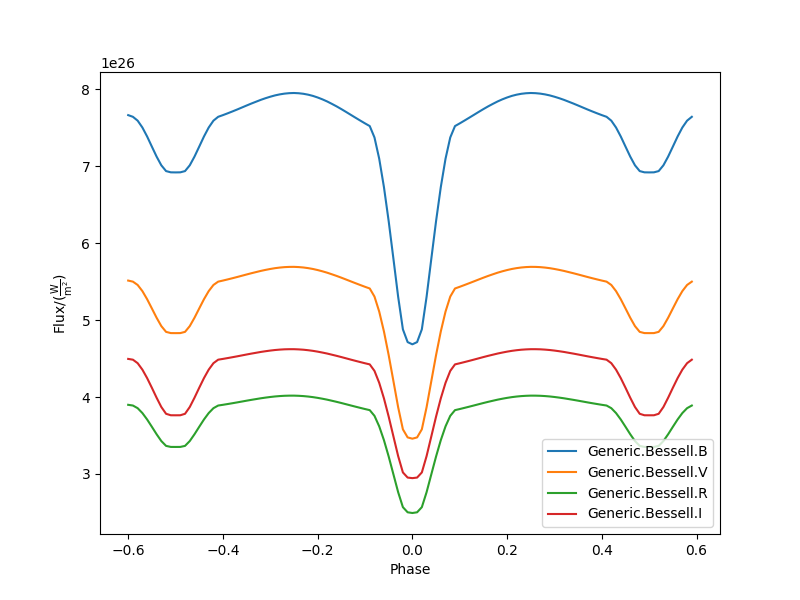

In [12]:
o.plot.phase_curve(phases=phases, fluxes=fluxes)